In [3]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline


# Customized Colorbars Tutorial


This tutorial shows how to build colorbars without an attached plot.

Customized Colorbars
====================

:class:`~matplotlib.colorbar.ColorbarBase` derives from
:mod:`~matplotlib.cm.ScalarMappable` and puts a colorbar in a specified axes,
so it has everything needed for a standalone colorbar. It can be used as-is to
make a colorbar for a given colormap; it does not need a mappable object like
an image. In this tutorial we will explore what can be done with standalone
colorbar.

Basic continuous colorbar
-------------------------

Set the colormap and norm to correspond to the data for which the colorbar
will be used. Then create the colorbar by calling
:class:`~matplotlib.colorbar.ColorbarBase` and specify axis, colormap, norm
and orientation as parameters. Here we create a basic continuous colorbar
with ticks and labels. For more information see the
:mod:`~matplotlib.colorbar` API.



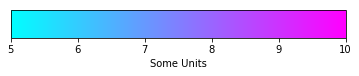

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=5, vmax=10)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Some Units')
fig.show()

Discrete intervals colorbar
---------------------------

The second example illustrates the use of a
:class:`~matplotlib.colors.ListedColormap` which generates a colormap from a
set of listed colors, :func:`colors.BoundaryNorm` which generates a colormap
index based on discrete intervals and extended ends to show the "over" and
"under" value colors. Over and under are used to display data outside of the
normalized [0,1] range. Here we pass colors as gray shades as a string
encoding a float in the 0-1 range.

If a :class:`~matplotlib.colors.ListedColormap` is used, the length of the
bounds array must be one greater than the length of the color list. The
bounds must be monotonically increasing.

This time we pass some more arguments in addition to previous arguments to
:class:`~matplotlib.colorbar.ColorbarBase`. For the out-of-range values to
display on the colorbar, we have to use the *extend* keyword argument. To use
*extend*, you must specify two extra boundaries. Finally spacing argument
ensures that intervals are shown on colorbar proportionally.



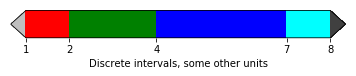

In [5]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.colors.ListedColormap(['red', 'green', 'blue', 'cyan'])
cmap.set_over('0.25')
cmap.set_under('0.75')

bounds = [1, 2, 4, 7, 8]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=[0] + bounds + [13],
                                extend='both',
                                ticks=bounds,
                                spacing='proportional',
                                orientation='horizontal')
cb2.set_label('Discrete intervals, some other units')
fig.show()

Colorbar with custom extension lengths
--------------------------------------

Here we illustrate the use of custom length colorbar extensions, used on a
colorbar with discrete intervals. To make the length of each extension the
same as the length of the interior colors, use ``extendfrac='auto'``.



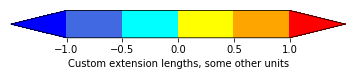

In [6]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.colors.ListedColormap(['royalblue', 'cyan',
                                  'yellow', 'orange'])
cmap.set_over('red')
cmap.set_under('blue')

bounds = [-1.0, -0.5, 0.0, 0.5, 1.0]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=[-10] + bounds + [10],
                                extend='both',
                                extendfrac='auto',
                                ticks=bounds,
                                spacing='uniform',
                                orientation='horizontal')
cb3.set_label('Custom extension lengths, some other units')
fig.show()

<class 'matplotlib.colors.ListedColormap'>


/home/kl/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


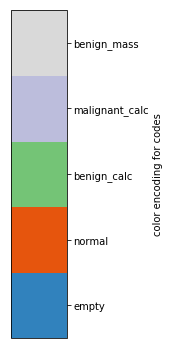

In [27]:
import numpy as np
fig, ax = plt.subplots(figsize=(1, 12))
fig.subplots_adjust(bottom=0.5)

cmap = plt.cm.tab20c

labels = ['empty', 'normal', 'benign_calc', 'malignant_calc', 'benign_mass', 'malignant_mass']
bounds = np.arange(len(labels)) 
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(ax, 
                                cmap=cmap,
                                norm=norm,
                                boundaries=[-10] + bounds + [10],
                                #extend='both',
                                #extendfrac='auto',
                                ticks=bounds,
                                spacing='uniform',
                                orientation='vertical')
cb3.set_label('color encoding of class codes')
cb3.set_ticklabels(labels)
cb3.set_ticks(0.5+bounds)
fig.show()

In [24]:
mpl.colorbar.ColorbarBase??